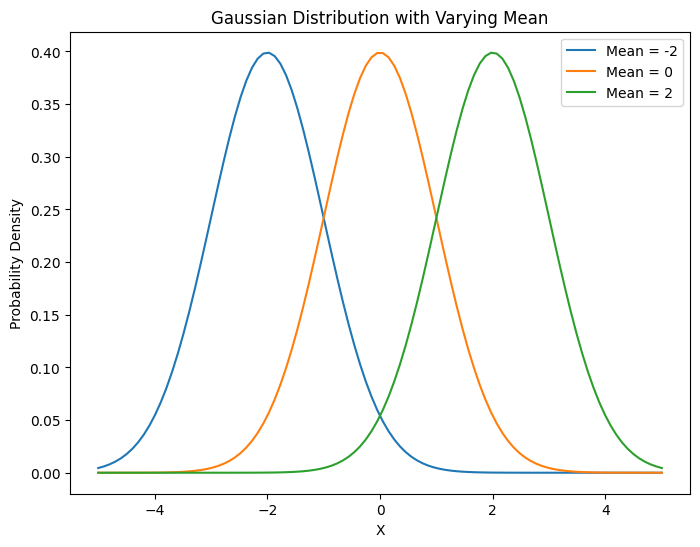

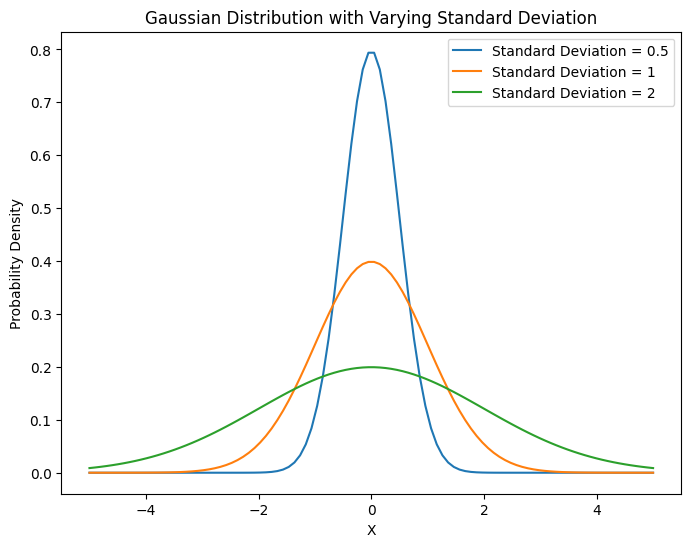

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def gaussian(x, mu, sigma):
  return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

x = np.linspace(-5, 5, 100)

# Varying mean
plt.figure(figsize=(8, 6))
for mu in [-2, 0, 2]:
  plt.plot(x, gaussian(x, mu, 1), label=f'Mean = {mu}')
plt.title('Gaussian Distribution with Varying Mean')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Varying variance
plt.figure(figsize=(8, 6))
for sigma in [0.5, 1, 2]:
  plt.plot(x, gaussian(x, 0, sigma), label=f'Standard Deviation = {sigma}')
plt.title('Gaussian Distribution with Varying Standard Deviation')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

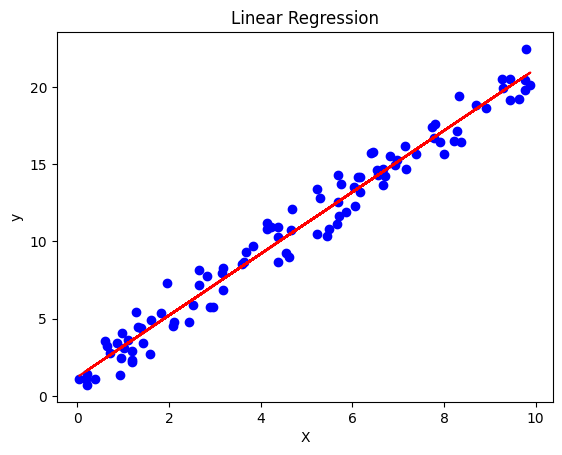

In [ ]:
class LinearRegression:
  def __init__(self):
    self.coefficients = None

  def fit(self, X, y):
    X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept
    self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

  def predict(self, X):
    X = np.c_[np.ones(X.shape[0]), X]
    return X @ self.coefficients

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


Final point after 100 iterations: 2.0370359763344878e-09


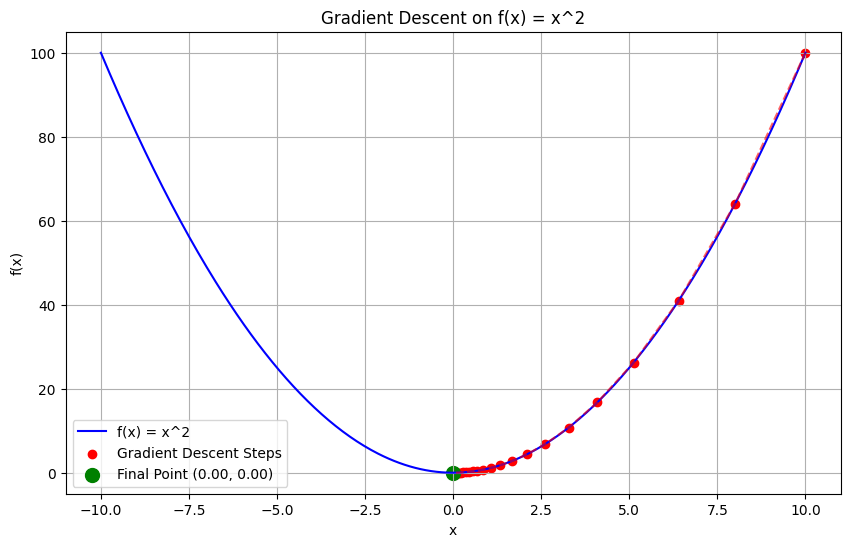

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(gradient, initial_point, learning_rate, n_iterations):
    # Initialize the starting point
    point = initial_point

    # Create a list to store the progress
    points = [point]

    for _ in range(n_iterations):
        # Calculate the gradient at the current point
        grad = gradient(point)

        # Update the point using the gradient and learning rate
        point = point - learning_rate * grad

        # Save the new point to the progress list
        points.append(point)

    return point, points

# Example: Minimizing the function f(x) = x^2
# The gradient of f(x) = x^2 is f'(x) = 2x
def gradient(x):
    return 2 * x

# Parameters
initial_point = 10.0  # Starting point
learning_rate = 0.1   # Step size
n_iterations = 100    # Number of iterations

# Run the gradient descent
final_point, points = gradient_descent(gradient, initial_point, learning_rate, n_iterations)

# Output the final point
print(f"Final point after {n_iterations} iterations: {final_point}")

# Plotting the progress of the gradient descent
plt.figure(figsize=(10, 6))

# Plotting f(x) = x^2
x = np.linspace(-initial_point, initial_point, 400)
y = x**2
plt.plot(x, y, label="f(x) = x^2", color="blue")

# Plotting the points visited by gradient descent
points = np.array(points)
plt.scatter(points, points**2, color="red", label="Gradient Descent Steps")
plt.plot(points, points**2, color="red", linestyle="dashed", alpha=0.6)

# Highlighting the final point
plt.scatter(final_point, final_point**2, color="green", s=100, label=f"Final Point ({final_point:.2f}, {final_point**2:.2f})")

# Adding labels and legend
plt.title("Gradient Descent on f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.2889 - loss: 1.7463 - val_accuracy: 0.4550 - val_loss: 1.2873
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4606 - loss: 1.2769 - val_accuracy: 0.4523 - val_loss: 1.2689
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4927 - loss: 1.2207 - val_accuracy: 0.4591 - val_loss: 1.2443
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5118 - loss: 1.1736 - val_accuracy: 0.4687 - val_loss: 1.2436
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5294 - loss: 1.1385 - val_accuracy: 0.4782 - val_loss: 1.2366
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5432 - loss: 1.1101 - val_accuracy: 0.4605 - val_loss: 1.2305
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5664 - loss: 1.0821 - val_accuracy: 0.4591 - val_loss: 1.2368
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5898 - loss: 1.0509 - val_accuracy: 0.4700 - val_loss: 1

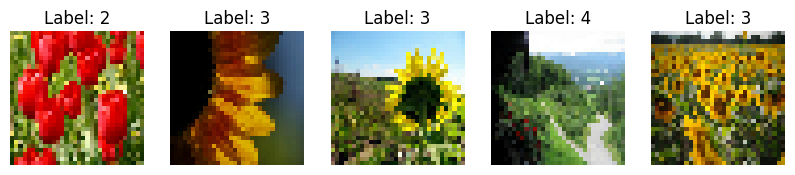

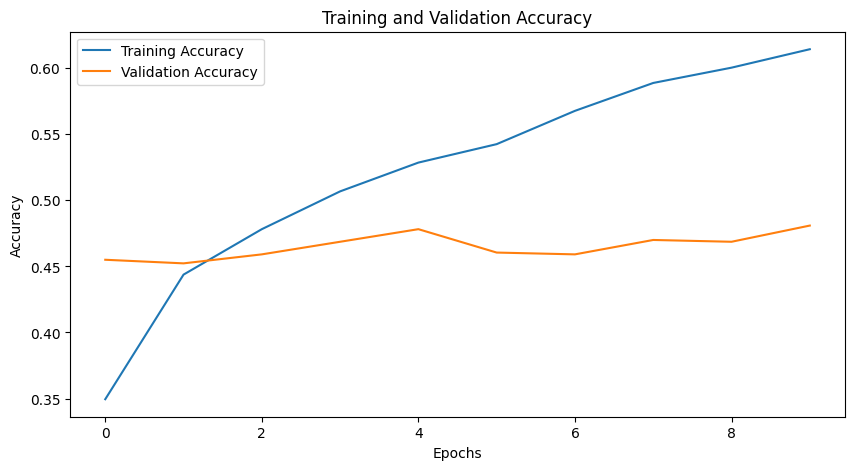

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the Flowers dataset from TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocess the dataset
def preprocess(image, label):
    image = tf.image.resize(image, (32, 32))  # Resize images to 32x32 pixels
    image = image / 255.0  # Normalize the pixel values
    label = tf.one_hot(label, ds_info.features['label'].num_classes)
    return image, label

# Apply preprocessing to the dataset
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Create the MLP model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(ds_info.features['label'].num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

# Evaluate the model
loss, accuracy = model.evaluate(ds_test)
print('Test accuracy:', accuracy)

# Plot sample images with true labels
def plot_samples(dataset, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {tf.argmax(label)}")
        plt.axis('off')
    plt.show()

# Plot some sample images from the training dataset
plot_samples(ds_train.unbatch())

# Plot training & validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Accuracy of the SVM classifier: 0.73


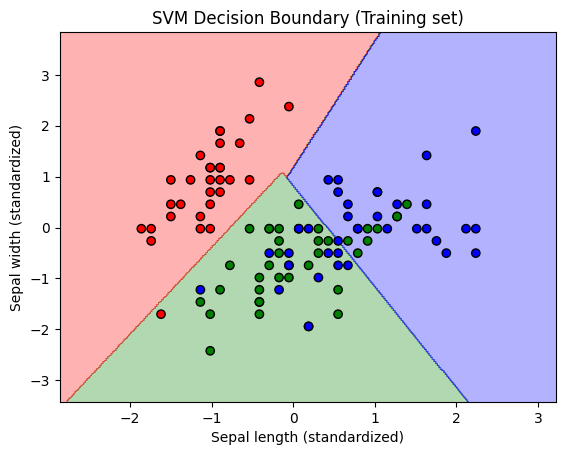

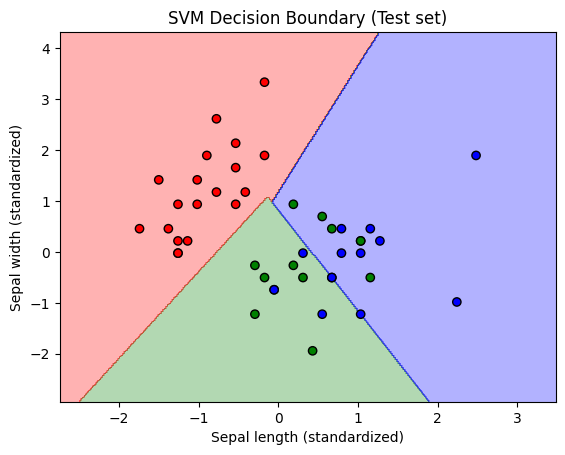

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only use the first two features for 2D visualization (sepal length, sepal width)
y = iris.target  # Labels (0, 1, 2 correspond to different species)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier: {accuracy:.2f}")

# Visualize the decision boundary
def plot_decision_boundary(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
    plt.title(title)
    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Sepal width (standardized)')
    plt.show()

# Plot the decision boundary for the training set
plot_decision_boundary(X_train, y_train, svm_classifier, "SVM Decision Boundary (Training set)")

# Plot the decision boundary for the test set
plot_decision_boundary(X_test, y_test, svm_classifier, "SVM Decision Boundary (Test set)")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │      37,880,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,979,205 (144.88 MB)

 Trainable params: 37,979,205 (144.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.3108 - loss: 1.9988 - val_accuracy: 0.5708 - val_loss: 1.0847
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.5861 - loss: 1.0334 - val_accuracy: 0.6322 - val_loss: 0.9187
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.6777 - loss: 0.8202 - val_accuracy: 0.6567 - val_loss: 0.8774
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.7633 - loss: 0.6400 - val_accuracy: 0.6458 - val_loss: 1.0057
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.8222 - loss: 0.4774 - val_accuracy: 0.5886 - val_loss: 1.3692
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.8554 - loss: 0.4020 - val_accuracy: 0.6471 - val_loss: 0.9988
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.9017 - loss: 0.2856 - val_accuracy: 0.6240 - val_loss: 1.3352
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.9227 - loss: 0.2263 - val_accuracy: 0.6281 - v

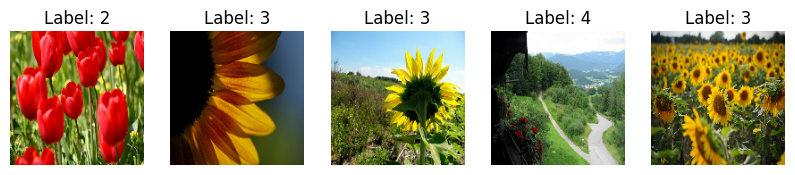

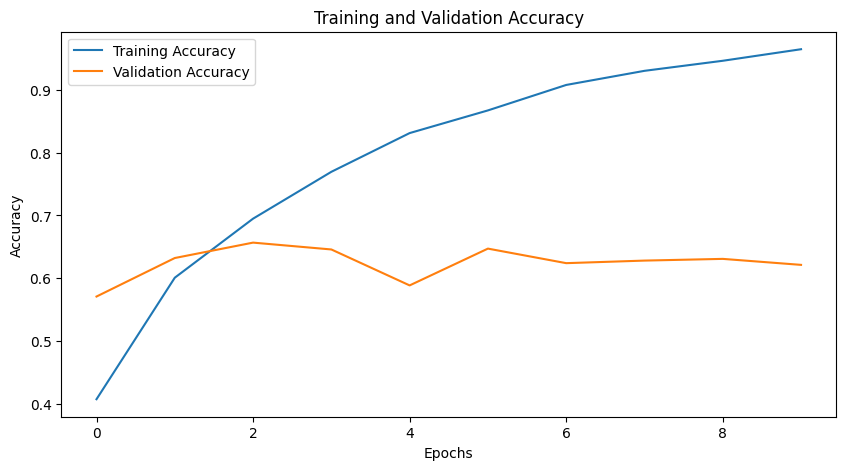

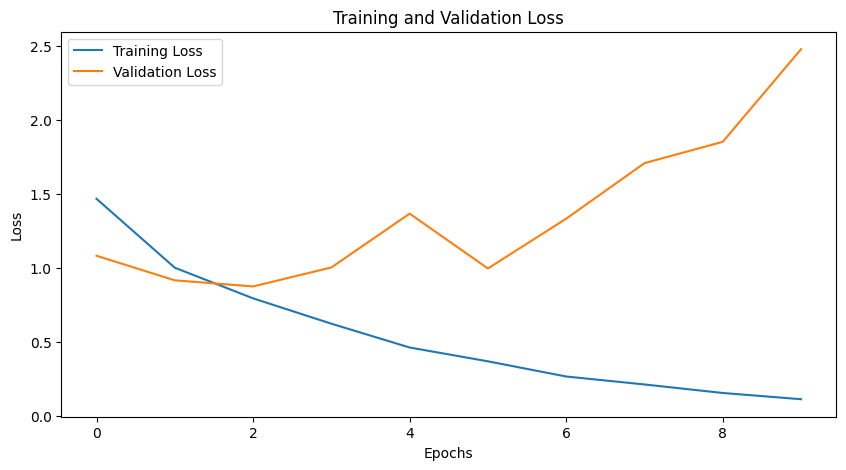

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Load the Flowers dataset from TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocess the dataset
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150))  # Resize images to 150x150 pixels
    image = image / 255.0  # Normalize the pixel values
    label = tf.one_hot(label, ds_info.features['label'].num_classes)
    return image, label

# Apply preprocessing to the dataset
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(ds_info.features['label'].num_classes, activation='softmax'))  # 5 flower classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Visualize the model architecture
model.summary()

# Train the model and capture the training history
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

# Evaluate the model
loss, accuracy = model.evaluate(ds_test)
print('Test accuracy:', accuracy)

# Plot sample images with true labels
def plot_samples(dataset, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {tf.argmax(label)}")
        plt.axis('off')
    plt.show()

# Plot some sample images from the training dataset
plot_samples(ds_train.unbatch())

# Plot training & validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [

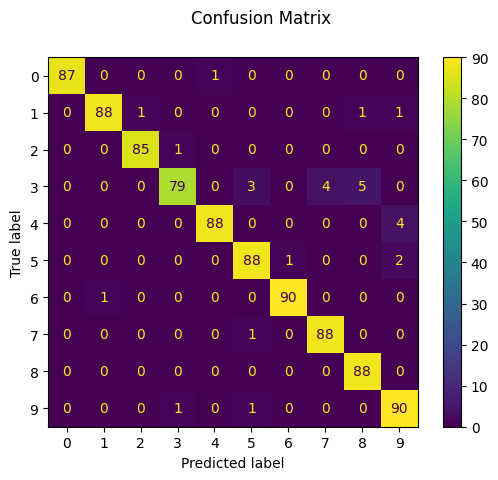

In [ ]:
# prompt: Write a python program to classify different handwritten character images using the SVM classifier.

import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = datasets.load_digits()

# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
classifier.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = classifier.predict(X_test)

print(
    f"Classification report for classifier {classifier}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.4482 - loss: 1.5386 - val_accuracy: 0.3989 - val_loss: 1.4912
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.5107 - loss: 1.3967 - val_accuracy: 0.3989 - val_loss: 1.4845
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.4902 - loss: 1.3922 - val_accuracy: 0.3989 - val_loss: 1.4888
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.4778 - loss: 1.3917 - val_accuracy: 0.3989 - val_loss: 1.5057
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.4895 - loss: 1.3758 - val_accuracy: 0.3989 - val_loss: 1.4830
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4855 - loss: 1.3961 - val_accuracy: 0.3989 - val_loss: 1.4925
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.4870 - loss: 1.3863 - val_accuracy: 0.3989 - val_loss: 1.4828
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.5067 - loss: 1.3670 - val_accuracy: 0.3989 - val_loss

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


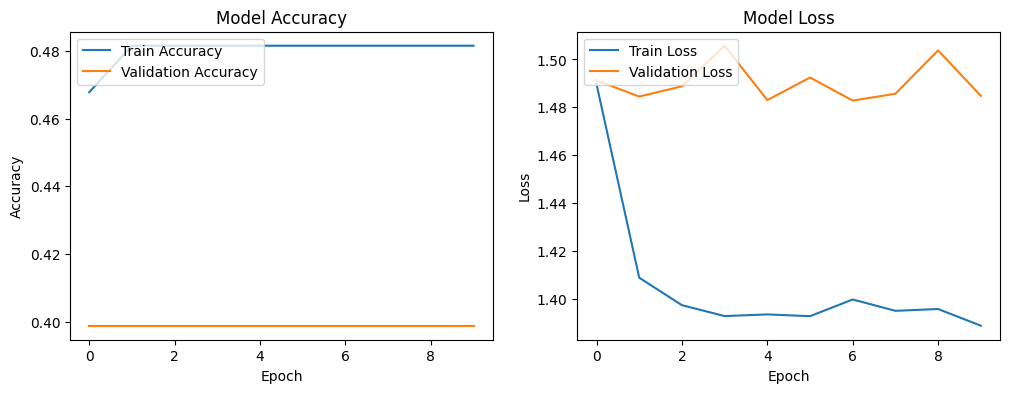

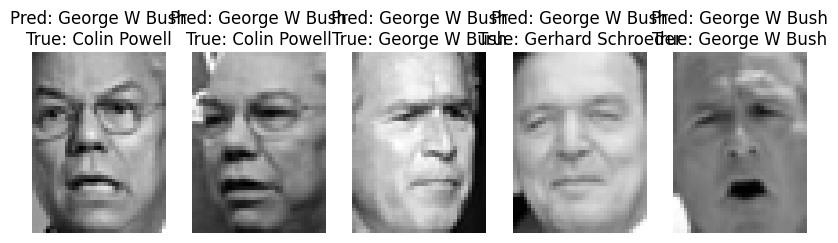

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_lfw_people

# Load the LFW (Labeled Faces in the Wild) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
X = lfw_people.images  # Face images (grayscale)
y = lfw_people.target  # Labels (people)
target_names = lfw_people.target_names  # Names of people

# Normalize the pixel values to be between 0 and 1
X = X / 255.0

# Add a channel dimension (since the images are grayscale)
X = X[..., np.newaxis]

# One-hot encode the labels
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(target_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Display classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show plots
plt.show()

# Show some sample test images with their predicted and true labels
n_samples = 5
plt.figure(figsize=(10, 5))
for i in range(n_samples):
    plt.subplot(1, n_samples, i + 1)
    plt.imshow(X_test[i].reshape(X_test.shape[1], X_test.shape[2]), cmap='gray')
    plt.title(f"Pred: {target_names[y_pred_classes[i]]}\nTrue: {target_names[y_true_classes[i]]}")
    plt.axis('off')

plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 347s 16s/step - accuracy: 0.2263 - loss: 1.6103 - val_accuracy: 0.2375 - val_loss: 1.6077
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 372s 16s/step - accuracy: 0.2557 - loss: 1.6073 - val_accuracy: 0.2375 - val_loss: 1.6057
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 307s 15s/step - accuracy: 0.2361 - loss: 1.6059 - val_accuracy: 0.2375 - val_loss: 1.6055
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 312s 16s/step - accuracy: 0.2416 - loss: 1.6019 - val_accuracy: 0.2375 - val_loss: 1.6059
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 319s 16s/step - accuracy: 0.2619 - loss: 1.6012 - val_accuracy: 0.2375 - val_loss: 1.6056
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 326s 16s/step - accuracy: 0.2580 - loss: 1.6019 - val_accuracy: 0.2375 - val_loss: 1.6058
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 378s 16s/step - accuracy: 0.2251 - loss: 1.6100 - val_accuracy: 0.2375 - val_loss: 1.6065
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 331s 16s/step - accuracy: 0.2603 - loss: 1.6011 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


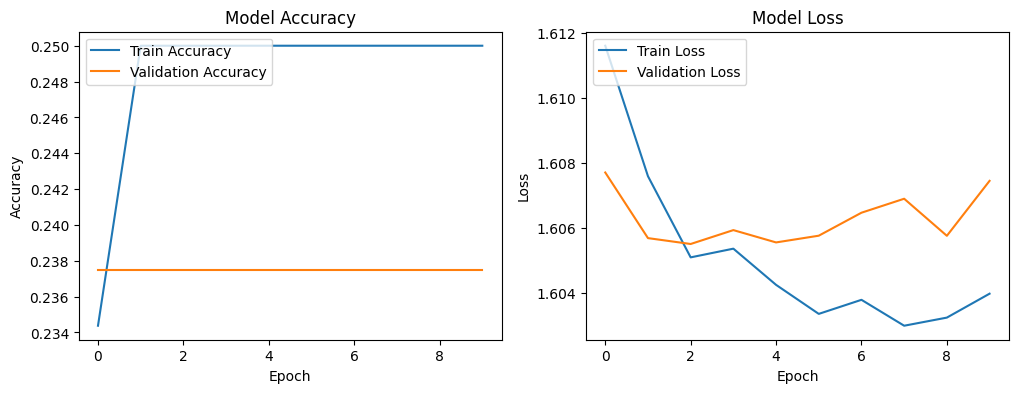

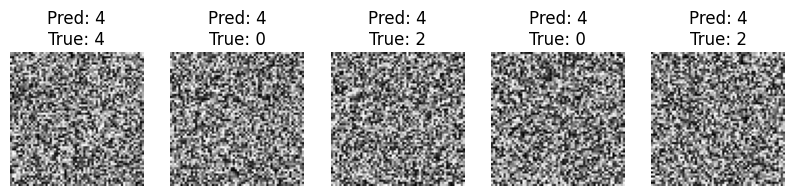

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# Simulate a gait recognition dataset (replace with real data)
# Let's assume X contains sequences of shape (num_sequences, num_frames, height, width, channels)
# and y contains labels for each sequence
num_sequences = 500
num_frames = 30  # Number of frames in each sequence
height, width, channels = 64, 64, 1  # Dimensions of each frame
num_classes = 5  # Number of different people (classes)

# Randomly generate data (replace with actual gait data)
X = np.random.rand(num_sequences, num_frames, height, width, channels)
y = np.random.randint(0, num_classes, num_sequences)

# Normalize pixel values
X = X / 255.0

# One-hot encode the labels
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CRNN model
model = models.Sequential([
    # TimeDistributed CNN layers to extract features from each frame
    layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu'), input_shape=(num_frames, height, width, channels)),
    layers.TimeDistributed(layers.MaxPooling2D((2, 2))),
    layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')),
    layers.TimeDistributed(layers.MaxPooling2D((2, 2))),
    layers.TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu')),
    layers.TimeDistributed(layers.MaxPooling2D((2, 2))),
    layers.TimeDistributed(layers.Flatten()),  # Flatten the CNN output

    # LSTM layers to process the sequence of features
    layers.LSTM(128, return_sequences=False),

    # Fully connected layer
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Display classification report
print(classification_report(y_true_classes, y_pred_classes))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show plots
plt.show()

# Show some sample test predictions
n_samples = 5
plt.figure(figsize=(10, 5))
for i in range(n_samples):
    plt.subplot(1, n_samples, i + 1)
    # Display the first frame of the sequence
    plt.imshow(X_test[i][0].reshape(height, width), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}\nTrue: {y_true_classes[i]}")
    plt.axis('off')

plt.show()


Found 220 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
7/7 [==============================] - 351s 53s/step - loss: 0.6610 - accuracy: 0.6091 - val_loss: 0.7799 - val_accuracy: 0.4541
Epoch 2/10
7/7 [==============================] - 357s 56s/step - loss: 0.5008 - accuracy: 0.7591 - val_loss: 0.6389 - val_accuracy: 0.6422
Epoch 3/10
7/7 [==============================] - 315s 47s/step - loss: 0.4397 - accuracy: 0.8182 - val_loss: 0.6549 - val_accuracy: 0.6376
Epoch 4/10
7/7 [==============================] - 307s 47s/step - loss: 0.3876 - accuracy: 0.8091 - val_loss: 0.8766 - val_accuracy: 0.5734
Epoch 5/10
7/7 [==============================] - 307s 47s/step - loss: 0.3501 - accuracy: 0.8500 - val_loss: 0.6682 - val_accuracy: 0.6468
Epoch 6/10
7/7 [==============================] - 308s 47s/step - loss: 0.3542 - accuracy: 0.8409 - val_loss: 0.

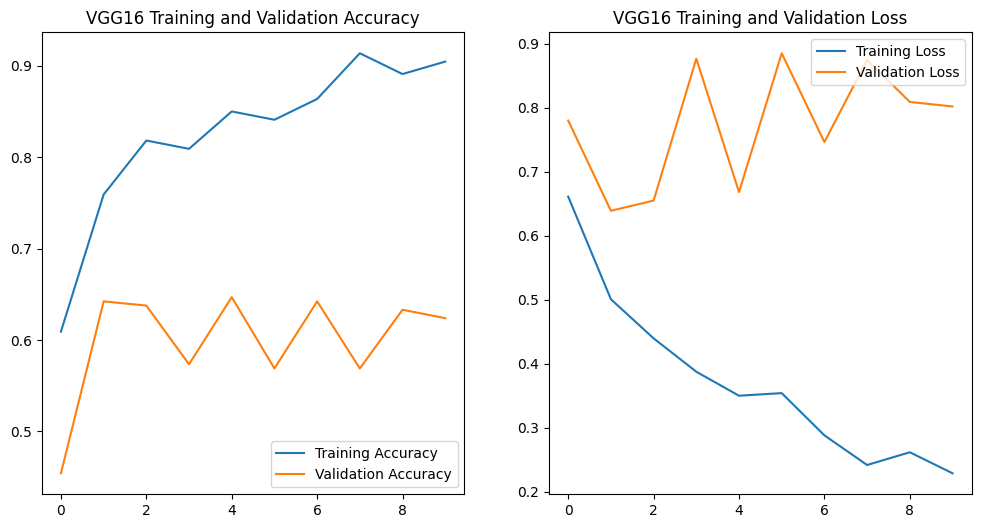

7/7 [==============================] - 159s 22s/step


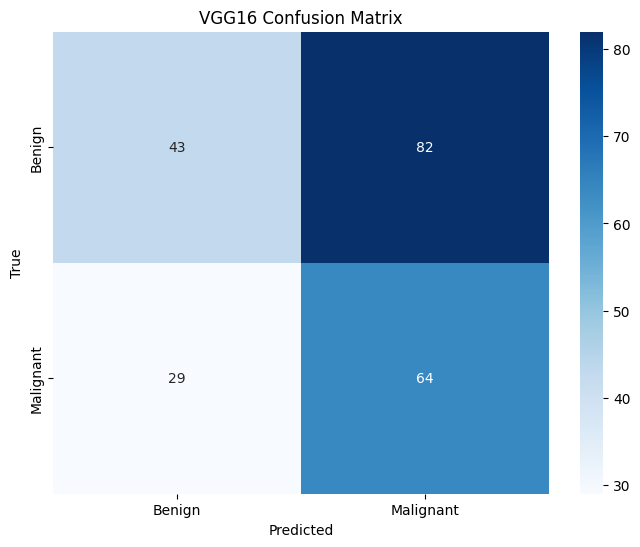

VGG16 Classification Report:
              precision    recall  f1-score   support

      Benign       0.60      0.34      0.44       125
   Malignant       0.44      0.69      0.54        93

    accuracy                           0.49       218
   macro avg       0.52      0.52      0.49       218
weighted avg       0.53      0.49      0.48       218

74836368/74836368 [==============================] - 1s 0us/step
Epoch 1/10
7/7 [==============================] - 165s 23s/step - loss: 1.1290 - accuracy: 0.6364 - val_loss: 0.4238 - val_accuracy: 0.7844
Epoch 2/10
7/7 [==============================] - 153s 24s/step - loss: 0.3778 - accuracy: 0.8455 - val_loss: 0.4628 - val_accuracy: 0.7294
Epoch 3/10
7/7 [==============================] - 137s 21s/step - loss: 0.2241 - accuracy: 0.9182 - val_loss: 0.4640 - val_accuracy: 0.7523
Epoch 4/10
7/7 [==============================] - 147s 22s/step - loss: 0.1627 - accuracy: 0.9318 - val_loss: 0.5195 - val_accuracy: 0.7569
Epoch 5/10
7/7 [===

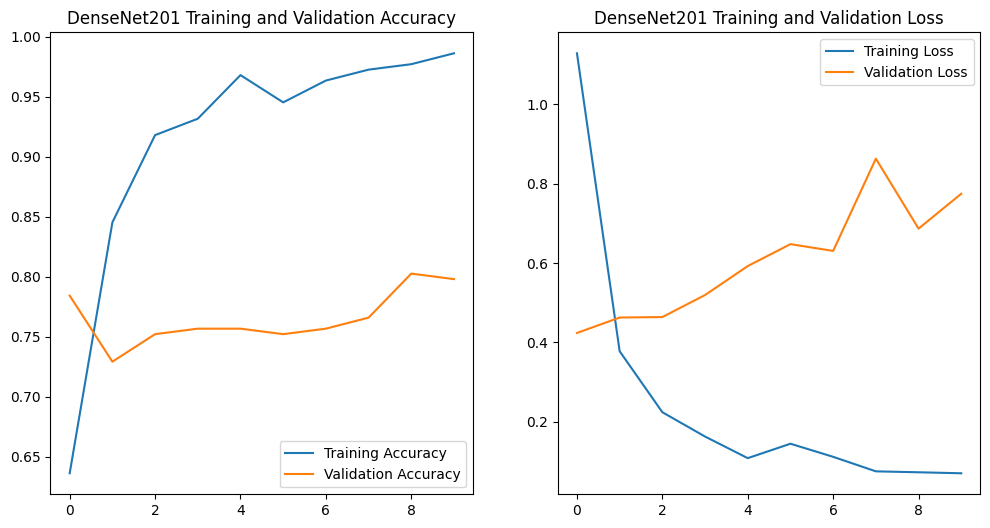

7/7 [==============================] - 73s 9s/step


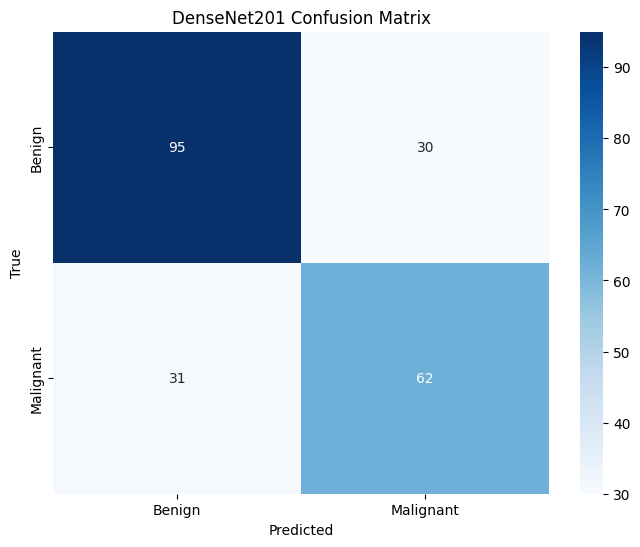

DenseNet201 Classification Report:
              precision    recall  f1-score   support

      Benign       0.75      0.76      0.76       125
   Malignant       0.67      0.67      0.67        93

    accuracy                           0.72       218
   macro avg       0.71      0.71      0.71       218
weighted avg       0.72      0.72      0.72       218



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16, DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Paths to the dataset directories (Kaggle BreakHis)
train_dir = '/content/drive/MyDrive/breakhis/train'
validation_dir = '/content/drive/MyDrive/breakhis/validation'
test_dir = '/content/drive/MyDrive/breakhis/test'

# Parameters
image_size = (224, 224)
batch_size = 32
epochs = 10
learning_rate = 0.0001

# Data augmentation and normalization for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Model building using VGG16
def build_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=output)

    # Freeze VGG16 layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

# Model building using DenseNet201
def build_densenet201_model():
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=output)

    # Freeze DenseNet201 layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

# Compile and train model
def compile_and_train(model, model_name):
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_generator,
                        epochs=epochs,
                        validation_data=validation_generator)

    return history

# Plotting accuracy and loss curves
def plot_training_curves(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.show()

# Evaluate model on test data and plot confusion matrix
def evaluate_and_plot_confusion_matrix(model, model_name):
    y_true = test_generator.classes
    y_pred = model.predict(test_generator)
    y_pred = np.round(y_pred).astype(int)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

# Train and evaluate VGG16 model
vgg16_model = build_vgg16_model()
vgg16_history = compile_and_train(vgg16_model, 'VGG16')
plot_training_curves(vgg16_history, 'VGG16')
evaluate_and_plot_confusion_matrix(vgg16_model, 'VGG16')

# Train and evaluate DenseNet201 model
densenet_model = build_densenet201_model()
densenet_history = compile_and_train(densenet_model, 'DenseNet201')
plot_training_curves(densenet_history, 'DenseNet201')
evaluate_and_plot_confusion_matrix(densenet_model, 'DenseNet201')
